# Regression in Scikit-Learn

In [85]:
# 4 Must Liberaries for Data Science
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Other Liberaries
from sklearn.model_selection import train_test_split # It is used to split the dataset into training and testing sets.
from sklearn.linear_model import LinearRegression # It is used to create a linear regression model.

In [86]:
# Import DataSet 
df = sns.load_dataset("titanic")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
# Check missing values percentage
missing_percentage = df['age'].isnull().sum() / len(df['age']) * 100
print(missing_percentage)

19.865319865319865


In [88]:
df['age'] = df['age'].fillna(df['age'].mean())  # ✅ Best approach

In [89]:
df_linear = df[['age', 'fare']].copy()  # ✅ Correct

In [90]:
df_linear.isnull().sum()

age     0
fare    0
dtype: int64

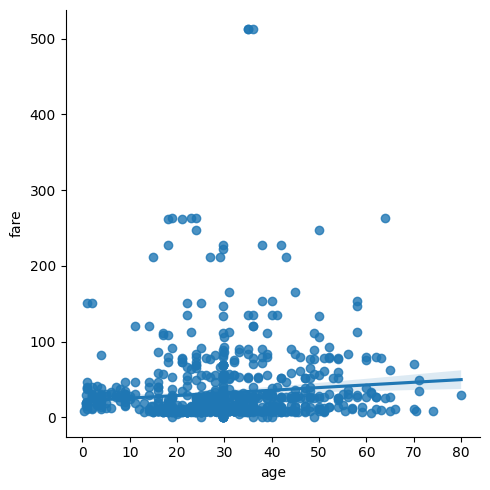

In [91]:
sns.lmplot(data = df_linear , x = 'age' , y = 'fare')

<Axes: ylabel='age'>

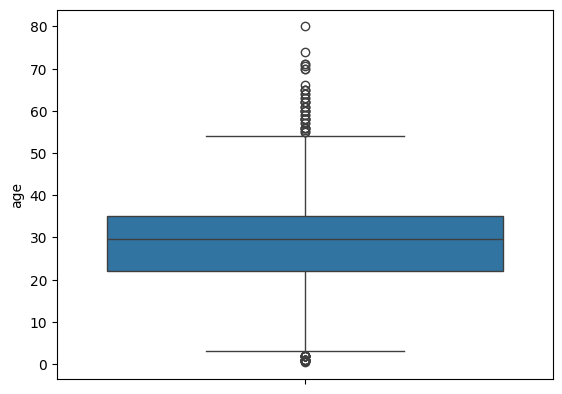

In [92]:
sns.boxplot(data=df_linear,y='age')

In [93]:
# Remove outliers Of Age

# Calculate IQR
Q1 = df_linear['age'].quantile(0.25)
Q3 = df_linear['age'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows within the IQR range
df_linear = df_linear[(df_linear['age'] >= lower_bound) & (df_linear['age'] <= upper_bound)]


<Axes: ylabel='fare'>

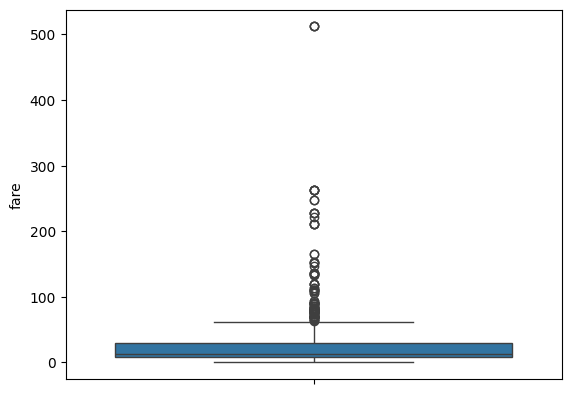

In [94]:
sns.boxplot(data=df_linear,y='fare')

In [95]:
# Calculate IQR
Q1 = df_linear['fare'].quantile(0.25)
Q3 = df_linear['fare'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows within the IQR range
df_linear = df_linear[(df_linear['fare'] >= lower_bound) & (df_linear['fare'] <= upper_bound)]


In [96]:
# Define X and y
X = df_linear[['age']]  # Features (DataFrame)
y = df_linear['fare']   # Target variable (Series)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X, y)

# Make Prediction for age using DataFrame (to avoid warning)
prediction = model.predict(pd.DataFrame([[80]], columns=['age']))

# Display the Prediction
print("Predicted Fare for age 55:", prediction[0])  # Display the scalar value

Predicted Fare for age 55: 23.351514600287302


1. R-squared (R²)
R² measures how well the model explains the variance in the target variable (y). It ranges from 0 to 1, where 1 indicates a perfect fit.
2. Mean Absolute Error (MAE)
MAE gives the average absolute difference between predicted and actual values.
3. Mean Squared Error (MSE)
MSE penalizes larger errors more than MAE, as it squares the errors.
4. Root Mean Squared Error (RMSE)
RMSE is the square root of MSE and gives an error metric in the same units as the target variable.

In [97]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Initializing
model = LinearRegression()

# Training
model.fit(X_trian , y_train)

# Prediction
prediction = model.predict(X_test)


<Axes: xlabel='fare'>

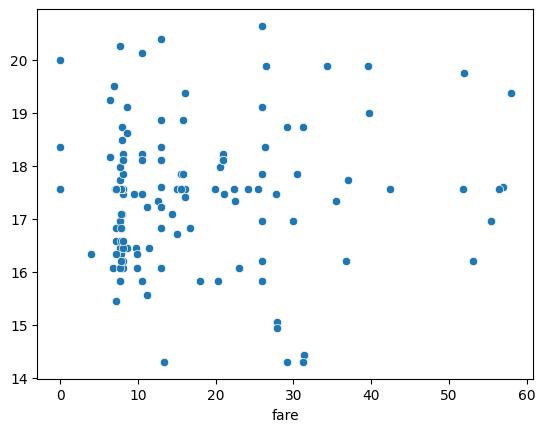

In [98]:
# Compare for checking accuracy if draw a line
sns.scatterplot( x= y_test , y = prediction)

In [99]:
model.score(X_test,y_test)

-0.002763133011255192

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 1. R-squared (R²)
r2 = r2_score(y_true=y_test, y_pred=prediction)

# 2. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true=y_test, y_pred=prediction)

# 3. Mean Squared Error (MSE)
mse = mean_squared_error(y_true=y_test, y_pred=prediction)

# 4. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Display Evaluation Metrics
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


R-squared (R²): -0.002763133011255192
Mean Absolute Error (MAE): 10.056001638614534
Mean Squared Error (MSE): 158.32998801351866
Root Mean Squared Error (RMSE): 12.582924461885586


| Metric | Like Saying...                             |
| ------ | ------------------------------------------ |
| R²     | "How much does my model understand?"       |
| MAE    | "How wrong am I on average?"               |
| MSE    | "How much am I punished for being wrong?"  |
| RMSE   | "What's my average mistake in real units?" |
